In [34]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\shiro\Downloads\omzetperday.csv')
df = df.drop('Tanggal', axis=1)
df = df['penjualan'].values
df

array([ 2133018,  4363851,  3090787,  7999816, 14494222, 19322506,
       15000732, 17140860, 14091330], dtype=int64)

### Develop LSTM Model for Univariate Time Series Forecasting

In [35]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

#preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[], []
    for i in range(len(timeseries_data)):
        #find the end of this pattern
        end_ix = i + n_features
        #check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [36]:
#define input sequence
timeseries_data = df.copy()
#choose a number of time steps
n_steps = 3
#split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [37]:
print(X), print(y)

[[ 2133018  4363851  3090787]
 [ 4363851  3090787  7999816]
 [ 3090787  7999816 14494222]
 [ 7999816 14494222 19322506]
 [14494222 19322506 15000732]
 [19322506 15000732 17140860]]
[ 7999816 14494222 19322506 15000732 17140860 14091330]


(None, None)

In [38]:
X.shape

(6, 3)

In [39]:
#reshape from [samples, timesteps] into [samples,  timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [40]:
#define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#fit model
model.fit(X, y, epochs=9000,  verbose=1)

Epoch 1/9000
6/6 [==============================] - 2s 267ms/sample - loss: 196998993018880.0000
Epoch 2/9000
6/6 [==============================] - 0s 659us/sample - loss: 195567040856064.0000
Epoch 3/9000
6/6 [==============================] - 0s 831us/sample - loss: 194200452726784.0000
Epoch 4/9000
6/6 [==============================] - 0s 997us/sample - loss: 192821348794368.0000
Epoch 5/9000
6/6 [==============================] - 0s 704us/sample - loss: 191423655706624.0000
Epoch 6/9000
6/6 [==============================] - 0s 665us/sample - loss: 189971654770688.0000
Epoch 7/9000
6/6 [==============================] - 0s 831us/sample - loss: 187134426218496.0000
Epoch 8/9000
6/6 [==============================] - 0s 779us/sample - loss: 185782014836736.0000
Epoch 9/9000
6/6 [==============================] - 0s 666us/sample - loss: 184409034588160.0000
Epoch 10/9000
6/6 [==============================] - 0s 665us/sample - loss: 183012566237184.0000
Epoch 11/9000
6/6 [==========

Epoch 85/9000
6/6 [==============================] - 0s 665us/sample - loss: 58961092935680.0000
Epoch 86/9000
6/6 [==============================] - 0s 831us/sample - loss: 57818577108992.0000
Epoch 87/9000
6/6 [==============================] - 0s 665us/sample - loss: 56764988915712.0000
Epoch 88/9000
6/6 [==============================] - 0s 665us/sample - loss: 55168171245568.0000
Epoch 89/9000
6/6 [==============================] - 0s 831us/sample - loss: 56669396533248.0000
Epoch 90/9000
6/6 [==============================] - 0s 665us/sample - loss: 56933167923200.0000
Epoch 91/9000
6/6 [==============================] - 0s 665us/sample - loss: 56735800754176.0000
Epoch 92/9000
6/6 [==============================] - 0s 665us/sample - loss: 56570306101248.0000
Epoch 93/9000
6/6 [==============================] - 0s 665us/sample - loss: 49094835830784.0000
Epoch 94/9000
6/6 [==============================] - 0s 665us/sample - loss: 48596049199104.0000
Epoch 95/9000
6/6 [===========

Epoch 169/9000
6/6 [==============================] - 0s 665us/sample - loss: 41884491710464.0000
Epoch 170/9000
6/6 [==============================] - 0s 665us/sample - loss: 41719626203136.0000
Epoch 171/9000
6/6 [==============================] - 0s 665us/sample - loss: 41564508258304.0000
Epoch 172/9000
6/6 [==============================] - 0s 665us/sample - loss: 41413781749760.0000
Epoch 173/9000
6/6 [==============================] - 0s 665us/sample - loss: 41262958772224.0000
Epoch 174/9000
6/6 [==============================] - 0s 499us/sample - loss: 41108176371712.0000
Epoch 175/9000
6/6 [==============================] - 0s 665us/sample - loss: 40696522211328.0000
Epoch 176/9000
6/6 [==============================] - 0s 665us/sample - loss: 40532273266688.0000
Epoch 177/9000
6/6 [==============================] - 0s 665us/sample - loss: 40358050267136.0000
Epoch 178/9000
6/6 [==============================] - 0s 831us/sample - loss: 40173500891136.0000
Epoch 179/9000
6/6 [

Epoch 253/9000
6/6 [==============================] - 0s 831us/sample - loss: 35376664150016.0000
Epoch 254/9000
6/6 [==============================] - 0s 665us/sample - loss: 33203853197312.0000
Epoch 255/9000
6/6 [==============================] - 0s 665us/sample - loss: 33043358154752.0000
Epoch 256/9000
6/6 [==============================] - 0s 665us/sample - loss: 32879291662336.0000
Epoch 257/9000
6/6 [==============================] - 0s 665us/sample - loss: 32711144112128.0000
Epoch 258/9000
6/6 [==============================] - 0s 665us/sample - loss: 36611291086848.0000
Epoch 259/9000
6/6 [==============================] - 0s 665us/sample - loss: 36217378832384.0000
Epoch 260/9000
6/6 [==============================] - 0s 665us/sample - loss: 35779346694144.0000
Epoch 261/9000
6/6 [==============================] - 0s 665us/sample - loss: 35262700716032.0000
Epoch 262/9000
6/6 [==============================] - 0s 831us/sample - loss: 34676527857664.0000
Epoch 263/9000
6/6 [

Epoch 337/9000
6/6 [==============================] - 0s 665us/sample - loss: 24116927135744.0000
Epoch 338/9000
6/6 [==============================] - 0s 665us/sample - loss: 23782691438592.0000
Epoch 339/9000
6/6 [==============================] - 0s 665us/sample - loss: 23445951741952.0000
Epoch 340/9000
6/6 [==============================] - 0s 665us/sample - loss: 23113620258816.0000
Epoch 341/9000
6/6 [==============================] - 0s 665us/sample - loss: 22789828378624.0000
Epoch 342/9000
6/6 [==============================] - 0s 665us/sample - loss: 22475918278656.0000
Epoch 343/9000
6/6 [==============================] - 0s 665us/sample - loss: 22170891714560.0000
Epoch 344/9000
6/6 [==============================] - 0s 831us/sample - loss: 21872318087168.0000
Epoch 345/9000
6/6 [==============================] - 0s 665us/sample - loss: 21577359949824.0000
Epoch 346/9000
6/6 [==============================] - 0s 665us/sample - loss: 21283771252736.0000
Epoch 347/9000
6/6 [

Epoch 421/9000
6/6 [==============================] - 0s 997us/sample - loss: 12120666144768.0000
Epoch 422/9000
6/6 [==============================] - 0s 831us/sample - loss: 12053854027776.0000
Epoch 423/9000
6/6 [==============================] - 0s 831us/sample - loss: 11985701830656.0000
Epoch 424/9000
6/6 [==============================] - 0s 831us/sample - loss: 11920266493952.0000
Epoch 425/9000
6/6 [==============================] - 0s 831us/sample - loss: 11857800724480.0000
Epoch 426/9000
6/6 [==============================] - 0s 997us/sample - loss: 11795407306752.0000
Epoch 427/9000
6/6 [==============================] - 0s 831us/sample - loss: 7967226724352.0000
Epoch 428/9000
6/6 [==============================] - 0s 665us/sample - loss: 7932494741504.0000
Epoch 429/9000
6/6 [==============================] - 0s 997us/sample - loss: 7851878121472.0000
Epoch 430/9000
6/6 [==============================] - 0s 831us/sample - loss: 7739671576576.0000
Epoch 431/9000
6/6 [====

Epoch 506/9000
6/6 [==============================] - 0s 665us/sample - loss: 5365468495872.0000
Epoch 507/9000
6/6 [==============================] - 0s 665us/sample - loss: 5332608221184.0000
Epoch 508/9000
6/6 [==============================] - 0s 831us/sample - loss: 5287568211968.0000
Epoch 509/9000
6/6 [==============================] - 0s 665us/sample - loss: 5235340738560.0000
Epoch 510/9000
6/6 [==============================] - 0s 665us/sample - loss: 5180246982656.0000
Epoch 511/9000
6/6 [==============================] - 0s 831us/sample - loss: 29251017375744.0000
Epoch 512/9000
6/6 [==============================] - 0s 665us/sample - loss: 5141549809664.0000
Epoch 513/9000
6/6 [==============================] - 0s 831us/sample - loss: 5155321282560.0000
Epoch 514/9000
6/6 [==============================] - 0s 665us/sample - loss: 28108382011392.0000
Epoch 515/9000
6/6 [==============================] - 0s 665us/sample - loss: 5284404133888.0000
Epoch 516/9000
6/6 [========

Epoch 591/9000
6/6 [==============================] - 0s 831us/sample - loss: 5917747183616.0000
Epoch 592/9000
6/6 [==============================] - 0s 665us/sample - loss: 5093170085888.0000
Epoch 593/9000
6/6 [==============================] - 0s 665us/sample - loss: 5269149974528.0000
Epoch 594/9000
6/6 [==============================] - 0s 665us/sample - loss: 5445600673792.0000
Epoch 595/9000
6/6 [==============================] - 0s 831us/sample - loss: 5556359659520.0000
Epoch 596/9000
6/6 [==============================] - 0s 665us/sample - loss: 5565162455040.0000
Epoch 597/9000
6/6 [==============================] - 0s 665us/sample - loss: 5476655300608.0000
Epoch 598/9000
6/6 [==============================] - 0s 665us/sample - loss: 5310452334592.0000
Epoch 599/9000
6/6 [==============================] - 0s 665us/sample - loss: 5103721381888.0000
Epoch 600/9000
6/6 [==============================] - 0s 665us/sample - loss: 4804331438080.0000
Epoch 601/9000
6/6 [==========

Epoch 676/9000
6/6 [==============================] - 0s 665us/sample - loss: 9689738772480.0000
Epoch 677/9000
6/6 [==============================] - 0s 665us/sample - loss: 9514129555456.0000
Epoch 678/9000
6/6 [==============================] - 0s 665us/sample - loss: 9336604590080.0000
Epoch 679/9000
6/6 [==============================] - 0s 665us/sample - loss: 9174441263104.0000
Epoch 680/9000
6/6 [==============================] - 0s 831us/sample - loss: 7347781500928.0000
Epoch 681/9000
6/6 [==============================] - 0s 665us/sample - loss: 16383791333376.0000
Epoch 682/9000
6/6 [==============================] - 0s 831us/sample - loss: 16898820407296.0000
Epoch 683/9000
6/6 [==============================] - 0s 665us/sample - loss: 16633636585472.0000
Epoch 684/9000
6/6 [==============================] - 0s 665us/sample - loss: 16360830664704.0000
Epoch 685/9000
6/6 [==============================] - 0s 665us/sample - loss: 16094988337152.0000
Epoch 686/9000
6/6 [=====

Epoch 761/9000
6/6 [==============================] - 0s 665us/sample - loss: 7156313620480.0000
Epoch 762/9000
6/6 [==============================] - 0s 665us/sample - loss: 7036186656768.0000
Epoch 763/9000
6/6 [==============================] - 0s 665us/sample - loss: 6913192886272.0000
Epoch 764/9000
6/6 [==============================] - 0s 665us/sample - loss: 6792902344704.0000
Epoch 765/9000
6/6 [==============================] - 0s 831us/sample - loss: 6679764140032.0000
Epoch 766/9000
6/6 [==============================] - 0s 665us/sample - loss: 6575800451072.0000
Epoch 767/9000
6/6 [==============================] - 0s 665us/sample - loss: 6483701399552.0000
Epoch 768/9000
6/6 [==============================] - 0s 665us/sample - loss: 6401455816704.0000
Epoch 769/9000
6/6 [==============================] - 0s 665us/sample - loss: 6327584161792.0000
Epoch 770/9000
6/6 [==============================] - 0s 665us/sample - loss: 6258160041984.0000
Epoch 771/9000
6/6 [==========

Epoch 846/9000
6/6 [==============================] - 0s 665us/sample - loss: 3098654277632.0000
Epoch 847/9000
6/6 [==============================] - 0s 665us/sample - loss: 3001788923904.0000
Epoch 848/9000
6/6 [==============================] - 0s 665us/sample - loss: 2911920455680.0000
Epoch 849/9000
6/6 [==============================] - 0s 665us/sample - loss: 2811936636928.0000
Epoch 850/9000
6/6 [==============================] - 0s 831us/sample - loss: 4061224763392.0000
Epoch 851/9000
6/6 [==============================] - 0s 665us/sample - loss: 3894951542784.0000
Epoch 852/9000
6/6 [==============================] - 0s 665us/sample - loss: 3615541428224.0000
Epoch 853/9000
6/6 [==============================] - 0s 665us/sample - loss: 3258760560640.0000
Epoch 854/9000
6/6 [==============================] - 0s 665us/sample - loss: 2864555229184.0000
Epoch 855/9000
6/6 [==============================] - 0s 831us/sample - loss: 2471035404288.0000
Epoch 856/9000
6/6 [==========

Epoch 932/9000
6/6 [==============================] - 0s 665us/sample - loss: 50698452992.0000
Epoch 933/9000
6/6 [==============================] - 0s 665us/sample - loss: 43593744384.0000
Epoch 934/9000
6/6 [==============================] - 0s 665us/sample - loss: 37157810176.0000
Epoch 935/9000
6/6 [==============================] - 0s 665us/sample - loss: 31477114880.0000
Epoch 936/9000
6/6 [==============================] - 0s 665us/sample - loss: 26584754176.0000
Epoch 937/9000
6/6 [==============================] - 0s 665us/sample - loss: 22463008768.0000
Epoch 938/9000
6/6 [==============================] - 0s 833us/sample - loss: 19051343872.0000
Epoch 939/9000
6/6 [==============================] - 0s 499us/sample - loss: 16259461120.0000
Epoch 940/9000
6/6 [==============================] - 0s 665us/sample - loss: 13980003328.0000
Epoch 941/9000
6/6 [==============================] - 0s 665us/sample - loss: 12101741568.0000
Epoch 942/9000
6/6 [==============================

6/6 [==============================] - 0s 665us/sample - loss: 3619244.7500
Epoch 1021/9000
6/6 [==============================] - 0s 665us/sample - loss: 3217746.0000
Epoch 1022/9000
6/6 [==============================] - 0s 665us/sample - loss: 2874612.7500
Epoch 1023/9000
6/6 [==============================] - 0s 665us/sample - loss: 2589267.5000
Epoch 1024/9000
6/6 [==============================] - 0s 665us/sample - loss: 2349991.0000
Epoch 1025/9000
6/6 [==============================] - 0s 665us/sample - loss: 2148544.7500
Epoch 1026/9000
6/6 [==============================] - 0s 665us/sample - loss: 1980619.1250
Epoch 1027/9000
6/6 [==============================] - 0s 831us/sample - loss: 1833485.0000
Epoch 1028/9000
6/6 [==============================] - 0s 665us/sample - loss: 1701510.8750
Epoch 1029/9000
6/6 [==============================] - 0s 665us/sample - loss: 1574314.1250
Epoch 1030/9000
6/6 [==============================] - 0s 665us/sample - loss: 1452118.6250
Epoc

Epoch 1111/9000
6/6 [==============================] - 0s 665us/sample - loss: 15658.6670
Epoch 1112/9000
6/6 [==============================] - 0s 665us/sample - loss: 15040.5420
Epoch 1113/9000
6/6 [==============================] - 0s 665us/sample - loss: 14549.3750
Epoch 1114/9000
6/6 [==============================] - 0s 499us/sample - loss: 13832.1670
Epoch 1115/9000
6/6 [==============================] - 0s 831us/sample - loss: 13184.1670
Epoch 1116/9000
6/6 [==============================] - 0s 665us/sample - loss: 12684.8330
Epoch 1117/9000
6/6 [==============================] - 0s 665us/sample - loss: 12263.8750
Epoch 1118/9000
6/6 [==============================] - 0s 665us/sample - loss: 11715.3750
Epoch 1119/9000
6/6 [==============================] - 0s 665us/sample - loss: 11307.5420
Epoch 1120/9000
6/6 [==============================] - 0s 665us/sample - loss: 10944.7080
Epoch 1121/9000
6/6 [==============================] - 0s 665us/sample - loss: 10415.3750
Epoch 1122

6/6 [==============================] - 0s 831us/sample - loss: 625.0417
Epoch 1204/9000
6/6 [==============================] - 0s 665us/sample - loss: 586.3750
Epoch 1205/9000
6/6 [==============================] - 0s 665us/sample - loss: 588.3750
Epoch 1206/9000
6/6 [==============================] - 0s 665us/sample - loss: 588.3750
Epoch 1207/9000
6/6 [==============================] - 0s 665us/sample - loss: 559.5417
Epoch 1208/9000
6/6 [==============================] - 0s 665us/sample - loss: 564.2083
Epoch 1209/9000
6/6 [==============================] - 0s 665us/sample - loss: 551.0417
Epoch 1210/9000
6/6 [==============================] - 0s 665us/sample - loss: 542.3333
Epoch 1211/9000
6/6 [==============================] - 0s 665us/sample - loss: 524.1667
Epoch 1212/9000
6/6 [==============================] - 0s 831us/sample - loss: 516.3750
Epoch 1213/9000
6/6 [==============================] - 0s 665us/sample - loss: 518.3750
Epoch 1214/9000
6/6 [===========================

Epoch 1297/9000
6/6 [==============================] - 0s 665us/sample - loss: 162.3750
Epoch 1298/9000
6/6 [==============================] - 0s 831us/sample - loss: 162.3750
Epoch 1299/9000
6/6 [==============================] - 0s 665us/sample - loss: 159.6667
Epoch 1300/9000
6/6 [==============================] - 0s 831us/sample - loss: 159.6667
Epoch 1301/9000
6/6 [==============================] - 0s 665us/sample - loss: 164.5417
Epoch 1302/9000
6/6 [==============================] - 0s 665us/sample - loss: 164.5417
Epoch 1303/9000
6/6 [==============================] - 0s 831us/sample - loss: 171.8750
Epoch 1304/9000
6/6 [==============================] - 0s 665us/sample - loss: 162.3750
Epoch 1305/9000
6/6 [==============================] - 0s 665us/sample - loss: 163.0417
Epoch 1306/9000
6/6 [==============================] - 0s 665us/sample - loss: 163.0417
Epoch 1307/9000
6/6 [==============================] - 0s 831us/sample - loss: 163.0417
Epoch 1308/9000
6/6 [===========

Epoch 1391/9000
6/6 [==============================] - 0s 831us/sample - loss: 61.0417
Epoch 1392/9000
6/6 [==============================] - 0s 1ms/sample - loss: 62.5417
Epoch 1393/9000
6/6 [==============================] - 0s 997us/sample - loss: 62.5417
Epoch 1394/9000
6/6 [==============================] - 0s 997us/sample - loss: 62.5417
Epoch 1395/9000
6/6 [==============================] - 0s 1000us/sample - loss: 62.1667
Epoch 1396/9000
6/6 [==============================] - 0s 831us/sample - loss: 66.1667
Epoch 1397/9000
6/6 [==============================] - 0s 831us/sample - loss: 66.1667
Epoch 1398/9000
6/6 [==============================] - 0s 831us/sample - loss: 66.1667
Epoch 1399/9000
6/6 [==============================] - 0s 998us/sample - loss: 62.1667
Epoch 1400/9000
6/6 [==============================] - 0s 997us/sample - loss: 62.8333
Epoch 1401/9000
6/6 [==============================] - 0s 831us/sample - loss: 62.8333
Epoch 1402/9000
6/6 [=======================

Epoch 1486/9000
6/6 [==============================] - 0s 665us/sample - loss: 32.0417
Epoch 1487/9000
6/6 [==============================] - 0s 665us/sample - loss: 32.3333
Epoch 1488/9000
6/6 [==============================] - 0s 665us/sample - loss: 32.3333
Epoch 1489/9000
6/6 [==============================] - 0s 665us/sample - loss: 32.0417
Epoch 1490/9000
6/6 [==============================] - 0s 665us/sample - loss: 32.0417
Epoch 1491/9000
6/6 [==============================] - 0s 831us/sample - loss: 32.0417
Epoch 1492/9000
6/6 [==============================] - 0s 499us/sample - loss: 32.0417
Epoch 1493/9000
6/6 [==============================] - 0s 665us/sample - loss: 32.0417
Epoch 1494/9000
6/6 [==============================] - 0s 665us/sample - loss: 32.0417
Epoch 1495/9000
6/6 [==============================] - 0s 499us/sample - loss: 32.0417
Epoch 1496/9000
6/6 [==============================] - 0s 665us/sample - loss: 32.0417
Epoch 1497/9000
6/6 [======================

Epoch 1581/9000
6/6 [==============================] - 0s 665us/sample - loss: 16.7083
Epoch 1582/9000
6/6 [==============================] - 0s 665us/sample - loss: 16.7083
Epoch 1583/9000
6/6 [==============================] - 0s 831us/sample - loss: 16.7083
Epoch 1584/9000
6/6 [==============================] - 0s 665us/sample - loss: 16.7083
Epoch 1585/9000
6/6 [==============================] - 0s 665us/sample - loss: 16.7083
Epoch 1586/9000
6/6 [==============================] - 0s 665us/sample - loss: 16.7083
Epoch 1587/9000
6/6 [==============================] - 0s 665us/sample - loss: 16.7083
Epoch 1588/9000
6/6 [==============================] - 0s 665us/sample - loss: 15.8333
Epoch 1589/9000
6/6 [==============================] - 0s 831us/sample - loss: 15.8333
Epoch 1590/9000
6/6 [==============================] - 0s 665us/sample - loss: 15.8333
Epoch 1591/9000
6/6 [==============================] - 0s 831us/sample - loss: 15.8333
Epoch 1592/9000
6/6 [======================

Epoch 1676/9000
6/6 [==============================] - 0s 665us/sample - loss: 9.6667
Epoch 1677/9000
6/6 [==============================] - 0s 665us/sample - loss: 9.6667
Epoch 1678/9000
6/6 [==============================] - 0s 665us/sample - loss: 9.6667
Epoch 1679/9000
6/6 [==============================] - 0s 831us/sample - loss: 9.6667
Epoch 1680/9000
6/6 [==============================] - 0s 665us/sample - loss: 5.6667
Epoch 1681/9000
6/6 [==============================] - 0s 831us/sample - loss: 5.5417
Epoch 1682/9000
6/6 [==============================] - 0s 665us/sample - loss: 6.2083
Epoch 1683/9000
6/6 [==============================] - 0s 665us/sample - loss: 6.2083
Epoch 1684/9000
6/6 [==============================] - 0s 665us/sample - loss: 5.5417
Epoch 1685/9000
6/6 [==============================] - 0s 665us/sample - loss: 5.5417
Epoch 1686/9000
6/6 [==============================] - 0s 499us/sample - loss: 5.5417
Epoch 1687/9000
6/6 [==============================] -

Epoch 1772/9000
6/6 [==============================] - 0s 831us/sample - loss: 5.5000
Epoch 1773/9000
6/6 [==============================] - 0s 665us/sample - loss: 5.5000
Epoch 1774/9000
6/6 [==============================] - 0s 665us/sample - loss: 5.5000
Epoch 1775/9000
6/6 [==============================] - 0s 665us/sample - loss: 5.5000
Epoch 1776/9000
6/6 [==============================] - 0s 665us/sample - loss: 5.5000
Epoch 1777/9000
6/6 [==============================] - 0s 831us/sample - loss: 5.5000
Epoch 1778/9000
6/6 [==============================] - 0s 665us/sample - loss: 5.5000
Epoch 1779/9000
6/6 [==============================] - 0s 665us/sample - loss: 5.5000
Epoch 1780/9000
6/6 [==============================] - 0s 665us/sample - loss: 6.1667
Epoch 1781/9000
6/6 [==============================] - 0s 665us/sample - loss: 6.1667
Epoch 1782/9000
6/6 [==============================] - 0s 665us/sample - loss: 6.1667
Epoch 1783/9000
6/6 [==============================] -

Epoch 1868/9000
6/6 [==============================] - 0s 665us/sample - loss: 4.8333
Epoch 1869/9000
6/6 [==============================] - 0s 665us/sample - loss: 4.8333
Epoch 1870/9000
6/6 [==============================] - 0s 665us/sample - loss: 4.8333
Epoch 1871/9000
6/6 [==============================] - 0s 665us/sample - loss: 4.8333
Epoch 1872/9000
6/6 [==============================] - 0s 665us/sample - loss: 4.3333
Epoch 1873/9000
6/6 [==============================] - 0s 665us/sample - loss: 4.3333
Epoch 1874/9000
6/6 [==============================] - 0s 665us/sample - loss: 4.3333
Epoch 1875/9000
6/6 [==============================] - 0s 665us/sample - loss: 4.3333
Epoch 1876/9000
6/6 [==============================] - 0s 499us/sample - loss: 4.3333
Epoch 1877/9000
6/6 [==============================] - 0s 665us/sample - loss: 4.3333
Epoch 1878/9000
6/6 [==============================] - 0s 831us/sample - loss: 4.3333
Epoch 1879/9000
6/6 [==============================] -

Epoch 1964/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 1965/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 1966/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 1967/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.8333
Epoch 1968/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 1969/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 1970/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 1971/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.8333
Epoch 1972/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 1973/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 1974/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.8333
Epoch 1975/9000
6/6 [==============================] -

Epoch 2060/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 2061/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.8333
Epoch 2062/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 2063/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 2064/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 2065/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 2066/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 2067/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 2068/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 2069/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.8333
Epoch 2070/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8333
Epoch 2071/9000
6/6 [==============================] -

Epoch 2156/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.6667
Epoch 2157/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.6667
Epoch 2158/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.6667
Epoch 2159/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.6667
Epoch 2160/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.6667
Epoch 2161/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2162/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2163/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2164/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2165/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2166/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2167/9000
6/6 [==============================] -

Epoch 2252/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2253/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2254/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2255/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2256/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2257/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2258/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2259/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2260/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2261/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2262/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2263/9000
6/6 [==============================] -

Epoch 2348/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2349/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2350/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2351/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2352/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2353/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2354/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2355/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2356/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2357/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2358/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2359/9000
6/6 [==============================] -

Epoch 2444/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.2083
Epoch 2445/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3750
Epoch 2446/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3750
Epoch 2447/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.2083
Epoch 2448/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.2083
Epoch 2449/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.2083
Epoch 2450/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.2083
Epoch 2451/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.2083
Epoch 2452/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.2083
Epoch 2453/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.3750
Epoch 2454/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.2083
Epoch 2455/9000
6/6 [==============================] -

Epoch 2540/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2541/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2542/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2543/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2544/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2545/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2546/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2547/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.1667
Epoch 2548/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2549/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2550/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2551/9000
6/6 [==============================] -

Epoch 2636/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2637/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2638/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.1667
Epoch 2639/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.1667
Epoch 2640/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2641/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2642/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2643/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.3333
Epoch 2644/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2645/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2646/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2647/9000
6/6 [==============================] -

Epoch 2732/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2733/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2734/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2735/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2736/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2737/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2738/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2739/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2740/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2741/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.1667
Epoch 2742/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2743/9000
6/6 [==============================] -

Epoch 2828/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2829/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2830/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2831/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2832/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2833/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2834/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2835/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2836/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.1667
Epoch 2837/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2838/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2839/9000
6/6 [==============================] -

Epoch 2924/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2925/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2926/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 2927/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2928/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2929/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2930/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2931/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2932/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 2933/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2934/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 2935/9000
6/6 [==============================] -

Epoch 3020/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.2083
Epoch 3021/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3750
Epoch 3022/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3750
Epoch 3023/9000
6/6 [==============================] - 0s 665us/sample - loss: 1.0417
Epoch 3024/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8750
Epoch 3025/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8750
Epoch 3026/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8750
Epoch 3027/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8750
Epoch 3028/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.2083
Epoch 3029/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.2083
Epoch 3030/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.2083
Epoch 3031/9000
6/6 [==============================] -

Epoch 3116/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3117/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3118/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3119/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3120/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3121/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.3333
Epoch 3122/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3123/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3124/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 3125/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3126/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3127/9000
6/6 [==============================] -

Epoch 3212/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3213/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3214/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3215/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3216/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3217/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3218/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3219/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3220/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.1667
Epoch 3221/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3222/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3223/9000
6/6 [==============================] -

Epoch 3308/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.3750
Epoch 3309/9000
6/6 [==============================] - 0s 665us/sample - loss: 1.0417
Epoch 3310/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.8750
Epoch 3311/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.2083
Epoch 3312/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.1667
Epoch 3313/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3314/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3315/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3316/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3317/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3318/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3319/9000
6/6 [==============================] -

Epoch 3404/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3405/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.1667
Epoch 3406/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3407/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3408/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3409/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3410/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.3333
Epoch 3411/9000
6/6 [==============================] - 0s 666us/sample - loss: 0.3333
Epoch 3412/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3413/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3414/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3415/9000
6/6 [==============================] -

Epoch 3500/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.3333
Epoch 3501/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3502/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3503/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3504/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3505/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3506/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3507/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3508/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.1667
Epoch 3509/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.1667
Epoch 3510/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3511/9000
6/6 [=============================

Epoch 3592/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3593/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 3594/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3595/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3596/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3597/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3598/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3599/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3600/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3601/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.0000e+00
Epoch 3602/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3603/9

Epoch 3684/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3685/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3686/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3687/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.0000e+00
Epoch 3688/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3689/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3690/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3691/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3692/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3693/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.0000e+00
Epoch 3694/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3695

Epoch 3776/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3777/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3778/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3779/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.0000e+00
Epoch 3780/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3781/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3782/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.0000e+00
Epoch 3783/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3784/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3785/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3786/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3787

Epoch 3868/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3869/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3870/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3871/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3872/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3873/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3874/9000
6/6 [==============================] - 0s 667us/sample - loss: 0.0000e+00
Epoch 3875/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3876/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.0000e+00
Epoch 3877/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3878/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3879

Epoch 3960/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3961/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3962/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3963/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3964/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3965/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3966/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 3967/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3968/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3969/9000
6/6 [==============================] - 0s 833us/sample - loss: 0.0000e+00
Epoch 3970/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 3971

Epoch 4052/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4053/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4054/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4055/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4056/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4057/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4058/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4059/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4060/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4061/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4062/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4063

6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4144/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4145/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4146/9000
6/6 [==============================] - 0s 832us/sample - loss: 0.0000e+00
Epoch 4147/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4148/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 4149/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4150/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4151/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4152/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4153/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4154/9000
6/6 [=======

Epoch 4235/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4236/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4237/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4238/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4239/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4240/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4241/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4242/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4243/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4244/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4245/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4246

Epoch 4327/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4328/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4329/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4330/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4331/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4332/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4333/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4334/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4335/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.0000e+00
Epoch 4336/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4337/9000
6/6 [==============================] - 0s 832us/sample - loss: 0.0000e+00
Epoch 4338

Epoch 4419/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4420/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4421/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4422/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4423/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4424/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4425/9000
6/6 [==============================] - 0s 499us/sample - loss: 0.0000e+00
Epoch 4426/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4427/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4428/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4429/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4430

6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4511/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4512/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4513/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4514/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4515/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4516/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4517/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4518/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4519/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4520/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 4521/9000
6/6 [=======

Epoch 4602/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4603/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4604/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4605/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4606/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4607/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 4608/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4609/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4610/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4611/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4612/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 4613

6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 4694/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4695/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4696/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4697/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4698/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4699/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4700/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4701/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4702/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4703/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4704/9000
6/6 [=====

Epoch 4785/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4786/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4787/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4788/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4789/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4790/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4791/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4792/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4793/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4794/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4795/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4796

Epoch 4877/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4878/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 4879/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4880/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4881/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4882/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4883/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4884/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4885/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4886/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 4887/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 4888

Epoch 4969/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4970/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4971/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4972/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4973/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4974/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4975/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4976/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4977/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4978/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4979/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 4980

6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5061/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5062/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5063/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5064/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5065/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5066/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5067/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5068/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5069/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5070/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5071/9000
6/6 [=====

Epoch 5152/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5153/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5154/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5155/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5156/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5157/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5158/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5159/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5160/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5161/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5162/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5163

Epoch 5244/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 5245/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 5246/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 5247/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 5248/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5249/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5250/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5251/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5252/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5253/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5254/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5255/9000
6/

Epoch 5336/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5337/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5338/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5339/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5340/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5341/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5342/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5343/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5344/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5345/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5346/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5347

Epoch 5428/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5429/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5430/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5431/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5432/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5433/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5434/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5435/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5436/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5437/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5438/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5439

Epoch 5520/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5521/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5522/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5523/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5524/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5525/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5526/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5527/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5528/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5529/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5530/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 5531

Epoch 5612/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5613/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5614/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5615/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5616/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5617/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5618/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5619/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5620/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5621/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5622/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5623

Epoch 5704/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5705/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5706/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5707/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5708/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5709/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5710/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5711/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5712/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5713/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5714/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5715

Epoch 5796/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5797/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5798/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5799/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5800/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 5801/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 5802/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5803/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5804/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5805/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5806/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5807/900

6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5888/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5889/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5890/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5891/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5892/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5893/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5894/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5895/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5896/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5897/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5898/9000
6/6 [=====

Epoch 5979/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5980/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 5981/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5982/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5983/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5984/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5985/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5986/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5987/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5988/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 5989/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 5990

Epoch 6071/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6072/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6073/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6074/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6075/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6076/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6077/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6078/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6079/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6080/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6081/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6082/9000
6/6 

6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6163/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6164/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6165/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6166/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6167/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6168/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6169/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6170/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6171/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6172/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6173/9000
6/6 [=====

Epoch 6254/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6255/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6256/9000
6/6 [==============================] - 0s 832us/sample - loss: 0.0000e+00
Epoch 6257/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6258/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6259/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6260/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6261/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6262/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6263/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6264/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6265

Epoch 6346/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6347/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6348/9000
6/6 [==============================] - 0s 832us/sample - loss: 0.0000e+00
Epoch 6349/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6350/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6351/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6352/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6353/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6354/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6355/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6356/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6357

Epoch 6438/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6439/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6440/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6441/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6442/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6443/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6444/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6445/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6446/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6447/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6448/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6449

Epoch 6530/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6531/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6532/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6533/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6534/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6535/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6536/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6537/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6538/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6539/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6540/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6541

Epoch 6622/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6623/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6624/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6625/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6626/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6627/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6628/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6629/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6630/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6631/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6632/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6633/9

Epoch 6714/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6715/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6716/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6717/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6718/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6719/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6720/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6721/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6722/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6723/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6724/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6725

6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6806/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6807/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6808/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6809/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6810/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6811/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6812/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6813/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6814/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6815/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6816/9000
6/6 [=====

Epoch 6897/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6898/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6899/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6900/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6901/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6902/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6903/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6904/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6905/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6906/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 6907/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 6908/9000
6/6 [===

Epoch 6989/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 6990/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6991/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6992/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6993/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6994/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6995/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6996/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 6997/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6998/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 6999/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7000

Epoch 7081/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7082/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7083/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7084/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7085/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7086/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7087/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7088/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7089/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7090/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7091/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7092

Epoch 7173/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 7174/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7175/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7176/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7177/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7178/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7179/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7180/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7181/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7182/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7183/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7184

Epoch 7265/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 7266/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7267/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7268/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7269/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7270/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7271/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7272/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7273/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7274/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7275/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7276

Epoch 7357/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7358/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7359/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7360/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7361/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7362/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7363/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7364/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7365/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7366/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7367/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 7368

Epoch 7449/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7450/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7451/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7452/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7453/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7454/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7455/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7456/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7457/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7458/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7459/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7460

Epoch 7541/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7542/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7543/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7544/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7545/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7546/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7547/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7548/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7549/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7550/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7551/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7552

6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7633/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7634/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7635/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7636/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7637/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7638/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7639/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7640/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7641/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7642/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7643/9000
6/6 [=====

Epoch 7724/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 7725/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 7726/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7727/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 7728/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 7729/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7730/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 7731/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 7732/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 7733/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 7734/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 7735/9000
6/6 [=======

Epoch 7816/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7817/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7818/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7819/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7820/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 7821/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7822/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7823/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7824/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7825/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7826/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7827

Epoch 7908/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7909/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7910/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7911/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7912/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7913/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7914/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 7915/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 7916/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7917/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7918/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 7919

Epoch 8000/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8001/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8002/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8003/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8004/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8005/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8006/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 8007/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8008/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8009/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8010/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8011

Epoch 8092/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8093/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8094/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8095/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8096/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8097/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8098/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8099/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8100/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8101/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8102/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8103

Epoch 8184/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8185/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8186/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8187/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8188/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8189/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8190/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8191/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8192/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8193/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8194/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8195

Epoch 8276/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8277/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8278/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8279/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8280/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8281/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8282/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8283/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8284/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8285/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8286/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8287

Epoch 8368/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8369/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8370/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8371/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8372/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8373/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8374/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8375/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8376/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8377/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8378/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8379

Epoch 8460/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8461/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8462/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8463/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8464/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8465/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 8466/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8467/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8468/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8469/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8470/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8471/9

Epoch 8552/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8553/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 8554/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8555/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8556/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8557/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 8558/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 8559/9000
6/6 [==============================] - 0s 1ms/sample - loss: 0.0000e+00
Epoch 8560/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8561/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8562/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 8563/9000
6/

Epoch 8644/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8645/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8646/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8647/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8648/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8649/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8650/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8651/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8652/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8653/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8654/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8655

Epoch 8736/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8737/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 8738/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8739/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 8740/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8741/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 8742/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8743/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8744/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8745/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8746/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8747

6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8828/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8829/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8830/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8831/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8832/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8833/9000
6/6 [==============================] - 0s 998us/sample - loss: 0.0000e+00
Epoch 8834/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8835/9000
6/6 [==============================] - 0s 665us/sample - loss: 0.0000e+00
Epoch 8836/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8837/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8838/9000
6/6 [=====

Epoch 8919/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8920/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8921/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8922/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8923/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8924/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8925/9000
6/6 [==============================] - 0s 997us/sample - loss: 0.0000e+00
Epoch 8926/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8927/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8928/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8929/9000
6/6 [==============================] - 0s 831us/sample - loss: 0.0000e+00
Epoch 8930

In [16]:
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

import tensorflow as tf 

model1 = tf.keras.models.load_model('shopeebis_model.h5')

### Predicting for the next 5 data

In [41]:
#demonstrate prediction for next 10 days
x_input = np.array([15000732, 17140860, 14091330]) #take 3 days revenue as starter
temp_input=list(x_input)
lst_output=[]
i=0
while(i<5):
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model1.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=1)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
        
print(lst_output)

1/1 [==============================] - 0s 354ms/sample
[15522461.]
1 day input [17140860. 14091330. 15522461.]
1 day output [[12613240.]]
2 day input [14091330. 15522461. 12613240.]
2 day output [[20275604.]]
3 day input [15522461. 12613240. 20275604.]
3 day output [[26397292.]]
4 day input [12613240. 20275604. 26397292.]
4 day output [[21781046.]]
[15522461.0, 12613240.0, 20275604.0, 26397292.0, 21781046.0]


In [51]:
output = pd.DataFrame(lst_output)
output['prediction'] = output[0]
output = output.drop(0, axis=1)
output

,prediction
0,15522461.0
1,12613240.0
2,20275604.0
3,26397292.0
4,21781046.0


### Visualizing the Output

In [64]:
import matplotlib.pyplot as plt

day_new = np.arange(1,10)
day_pred = np.arange(10,15)

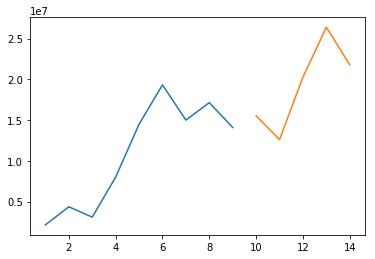

In [65]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)

### Append dataframe of real data and prediction

In [43]:
# dataf = pd.read_csv(r'C:\Users\shiro\Downloads\Shopee_Jovee_OmzetPenjualan_perday-shopeebis_omzetperday.csv')
result = dataf.append(output)
result

C:\Users\shiro\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Tanggal,penjualan
0,03/05/2021,2133018.0
1,03/06/2021,4363851.0
2,03/07/2021,3090787.0
3,03/08/2021,7999816.0
4,03/09/2021,14494222.0
5,03/10/2021,19322506.0
6,03/11/2021,15000732.0
7,03/12/2021,17140860.0
8,03/13/2021,14091330.0
0,NaN,15522461.0


In [30]:
result.set_index('Tanggal', inplace=True)
result

,penjualan
Tanggal,
03/05/2021,2133018.0
03/06/2021,4363851.0
03/07/2021,3090787.0
03/08/2021,7999816.0
03/09/2021,14494222.0
03/10/2021,19322506.0
03/11/2021,15000732.0
03/12/2021,17140860.0
03/13/2021,14091330.0


In [25]:
result.to_excel('Shopeebis_LSTM_9days.xlsx')

### References:
#### Jason Brownlee https://machinelearningmastery.com/lstm-autoencoders/ 
#### Krish Naik https://www.youtube.com/watch?v=UbvkhuqVqUI&t=1070s